In [ ]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import regularizers
import tensorflow as tf
from matplotlib import pyplot
import pandas as pd
from numpy import expand_dims
from google.colab import drive
import pathlib
from skimage import io
from tensorflow.keras import datasets, layers, models
import os
import cv2
import numpy as np
from  matplotlib import pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/'NEURAL NETWORK PROJECT'/Datasets

test  train


In [ ]:
dataset = "drive/MyDrive/NEURAL NETWORK PROJECT/Datasets/"

train = dataset + "train"
test = dataset + "test"

In [ ]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            # image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

def convert_class(class_vec, class_names):
    target_dict={k: v for v, k in enumerate(np.unique(class_names))}
    target_val = [target_dict[class_vec[i]] for i in range(len(class_vec))]
    return target_val


train_X, class_X = create_dataset(train)
test_X, class_Y = create_dataset(test)

train_Y = convert_class(class_X, class_X)
test_Y = convert_class(class_Y, class_X)



In [ ]:
print(train_Y)
print(test_Y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 0, 0, 0, 1, 1, 1, 3, 3, 3]


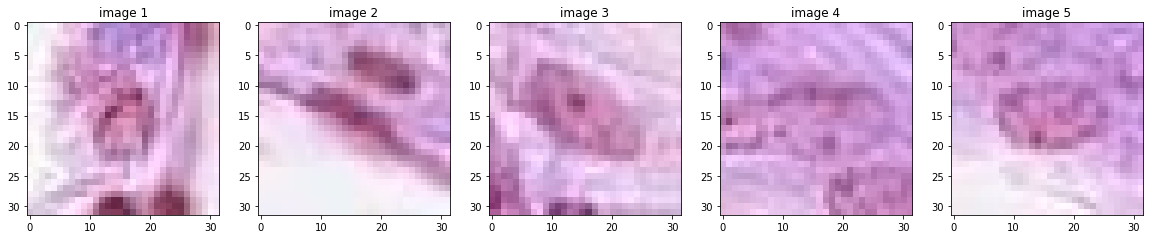

In [ ]:
plt.figure(figsize=(20,20))
for i in range(5):
    img = train_X[i] 
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text("image " + str(i+1))
    plt.imshow(img)

In [ ]:
class RCCNet():
    def __init__(self):
        """self.model = models.Sequential()
        self.model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
        self.model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 32)))
        self.model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 32)))
        self.model.add(layers.MaxPooling2D((2, 2)))
        self.model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.model.add(layers.MaxPooling2D((2, 2)))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(4))"""
        self.model = models.Sequential()
        weight_decay = 0.0005
        self.model.add(layers.Conv2D(96, (5, 5), input_shape=(32, 32, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
        self.model.add(layers.BatchNormalization())
        self.model.add(layers.Conv2D(256, (5, 5), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
        self.model.add(layers.BatchNormalization())
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2), name='block1_maxpooling2'))
        self.model.add(layers.Conv2D(384, (3, 3), activation='relu', name='block1_conv3', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        self.model.add(layers.BatchNormalization())
        self.model.add(layers.Conv2D(384, (3, 3), activation='relu', name='block1_conv4', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        self.model.add(layers.BatchNormalization())
        self.model.add(layers.Conv2D(256, (3, 3), activation='relu', name='block1_conv5', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        self.model.add(layers.BatchNormalization())
        self.model.add(layers.Dropout(0.4, name='dropout_2'))
        self.model.add(layers.Flatten(name='flatten'))
        self.model.add(layers.Dense(4, activation='softmax', name='predictions'))

    def summary(self):
        self.model.summary()
    
    def get_model(self):
        return self.model

    def train_model(self, train_X, train_Y, n_epochs=10):
        self.model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

        self.history = self.model.fit(x=np.array(train_X, np.float32), y=np.array(list(map(int,train_Y)), np.float32), epochs=n_epochs)
        return self.history

    def predict(self, test_X):
        pred = self.model.predict(x=np.array(test_X, np.float32)) 
        pred = np.argmax(pred, axis = 1)
        return pred


rccnet = RCCNet()
rccnet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 96)        7296      
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 96)        384       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 256)       614656    
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 256)       1024      
_________________________________________________________________
block1_maxpooling2 (MaxPooli (None, 12, 12, 256)       0         
_________________________________________________________________
block1_conv3 (Conv2D)        (None, 12, 12, 384)       885120    
_________________________________________________________________
batch_normalization_17 (Batc (None, 12, 12, 384)      

In [ ]:
history = rccnet.train_model(train_X, train_Y, 10)

Epoch 1/10
2/2 [==============================] - 6s 1s/step - loss: 3.5070 - accuracy: 0.3182
Epoch 2/10
2/2 [==============================] - 5s 1s/step - loss: 3.5433 - accuracy: 0.6364
Epoch 3/10
2/2 [==============================] - 5s 1s/step - loss: 2.7663 - accuracy: 0.7500
Epoch 4/10
2/2 [==============================] - 5s 1s/step - loss: 1.6782 - accuracy: 0.7727
Epoch 5/10
2/2 [==============================] - 5s 1s/step - loss: 0.9712 - accuracy: 0.9318
Epoch 6/10
2/2 [==============================] - 5s 1s/step - loss: 1.0459 - accuracy: 0.8636
Epoch 7/10
2/2 [==============================] - 5s 1s/step - loss: 0.8083 - accuracy: 0.8864
Epoch 8/10
2/2 [==============================] - 5s 1s/step - loss: 1.0712 - accuracy: 0.8864
Epoch 9/10
2/2 [==============================] - 5s 1s/step - loss: 0.6087 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 5s 1s/step - loss: 1.2708 - accuracy: 0.8636


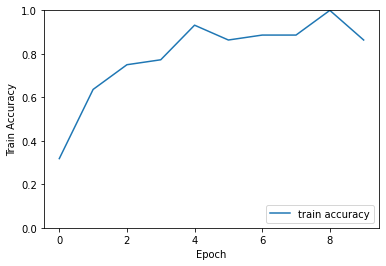

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_X,  test_Y, verbose=2)

In [ ]:
pred = rccnet.predict(np.array(test_X, np.float32)) 
print(pred)
print(test_Y)
report = classification_report(test_Y, pred)
print(report)

[2 2 2 2 2 2 2 2 2 2 2 2]
[2, 2, 2, 0, 0, 0, 1, 1, 1, 3, 3, 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.25      1.00      0.40         3
           3       0.00      0.00      0.00         3

    accuracy                           0.25        12
   macro avg       0.06      0.25      0.10        12
weighted avg       0.06      0.25      0.10        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training with Data Augmentation

In [ ]:
from copy import deepcopy

aug_train_X = deepcopy(train_X)
aug_train_Y = deepcopy(train_Y)

In [ ]:
for k in range(len(train_X)):
  samples = expand_dims(train_X[k], 0)
  # create image data augmentation generator
  datagen = ImageDataGenerator(width_shift_range=[-5,5])
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  for i in range(9):
      # define subplot
      #pyplot.subplot(330 + 1 + i)
	  # generate batch of images
      batch = it.next()
      # convert to unsigned integers for viewing
      image = batch[0].astype('float32')
      aug_train_X.append(image)
      aug_train_Y.append(train_Y[k])
	    #plot raw pixel data
      #pyplot.imshow(image)
      #show the figure
  #pyplot.show()

In [ ]:
for k in range(len(train_X)):
  samples = expand_dims(train_X[k], 0)
  # create image data augmentation generator
  datagen = ImageDataGenerator(height_shift_range=0.5)
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  for i in range(9):
      # define subplot
      #pyplot.subplot(330 + 1 + i)
	  # generate batch of images
      batch = it.next()
      # convert to unsigned integers for viewing
      image = batch[0].astype('float32')
      aug_train_X.append(image)
      aug_train_Y.append(train_Y[k])
	  # plot raw pixel data
      #pyplot.imshow(image)
      #show the figure
  #pyplot.show()

In [ ]:
for k in range(len(train_X)):
  samples = expand_dims(train_X[k], 0)
  # create image data augmentation generator
  datagen = ImageDataGenerator(horizontal_flip=True)
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  for i in range(9):
      # define subplot
      #pyplot.subplot(330 + 1 + i)
	  # generate batch of images
      batch = it.next()
      # convert to unsigned integers for viewing
      image = batch[0].astype('float32')
      aug_train_X.append(image)
      aug_train_Y.append(train_Y[k])
	  # plot raw pixel data
      #pyplot.imshow(image)
      #show the figure
  #pyplot.show()

In [ ]:
for k in range(len(train_X)):
  samples = expand_dims(train_X[k], 0)
  # create image data augmentation generator
  datagen = ImageDataGenerator(rotation_range=90)
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  for i in range(9):
      # define subplot
      #pyplot.subplot(330 + 1 + i)
	  # generate batch of images
      batch = it.next()
      # convert to unsigned integers for viewing
      image = batch[0].astype('float32')
      aug_train_X.append(image)
      aug_train_Y.append(train_Y[k])
	  # plot raw pixel data
      #pyplot.imshow(image)
      #show the figure
  #pyplot.show()

In [ ]:
for j in range(len(train_X)):
  samples = expand_dims(train_X[j], 0)
  datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
  it = datagen.flow(samples, batch_size=1)
  for i in range(9):
      # define subplot
      #pyplot.subplot(330 + 1 + i)
	  # generate batch of images
      batch = it.next()
      image = batch[0].astype('uint8')
      aug_train_X.append(image)
      aug_train_Y.append(train_Y[k])
      #pyplot.imshow(image)
      #show the figure
  #pyplot.show()

In [ ]:
for k in range(len(train_X)):
  samples = expand_dims(train_X[k], 0)
  # create image data augmentation generator
  datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  for i in range(9):
      # define subplot
      #pyplot.subplot(330 + 1 + i)
	  # generate batch of images
      batch = it.next()
      # convert to unsigned integers for viewing
      image = batch[0].astype('float32')
      aug_train_X.append(image)
      aug_train_Y.append(train_Y[k])
	  # plot raw pixel data
      #pyplot.imshow(image)
      #show the figure
  #pyplot.show()

In [ ]:
augmented_rccnet = RCCNet()
augmented_rccnet.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 96)        7296      
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 96)        384       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 256)       614656    
_________________________________________________________________
batch_normalization_21 (Batc (None, 24, 24, 256)       1024      
_________________________________________________________________
block1_maxpooling2 (MaxPooli (None, 12, 12, 256)       0         
_________________________________________________________________
block1_conv3 (Conv2D)        (None, 12, 12, 384)       885120    
_________________________________________________________________
batch_normalization_22 (Batc (None, 12, 12, 384)      

In [ ]:
history2 = augmented_rccnet.train_model(aug_train_X, aug_train_Y, 10)

Epoch 1/10
78/78 [==============================] - 263s 3s/step - loss: 3.6272 - accuracy: 0.4057
Epoch 2/10
78/78 [==============================] - 262s 3s/step - loss: 1.8520 - accuracy: 0.4904
Epoch 3/10
78/78 [==============================] - 263s 3s/step - loss: 1.7895 - accuracy: 0.5008
Epoch 4/10
78/78 [==============================] - 262s 3s/step - loss: 1.8597 - accuracy: 0.5241
Epoch 5/10
78/78 [==============================] - 262s 3s/step - loss: 1.8450 - accuracy: 0.5140
Epoch 6/10
78/78 [==============================] - 263s 3s/step - loss: 1.6270 - accuracy: 0.5646
Epoch 7/10
78/78 [==============================] - 263s 3s/step - loss: 1.4997 - accuracy: 0.6124
Epoch 8/10
78/78 [==============================] - 262s 3s/step - loss: 1.6973 - accuracy: 0.5518
Epoch 9/10
78/78 [==============================] - 261s 3s/step - loss: 1.4339 - accuracy: 0.6188
Epoch 10/10
78/78 [==============================] - 263s 3s/step - loss: 1.3962 - accuracy: 0.6224


In [ ]:
pred2 = augmented_rccnet.predict(np.array(test_X, np.float32)) 
print(pred2)
print(test_Y)
report2 = classification_report(test_Y, pred2)
print(report2)

[0 0 0 0 0 0 0 0 0 2 0 2]
[2, 2, 2, 0, 0, 0, 1, 1, 1, 3, 3, 3]
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3

    accuracy                           0.25        12
   macro avg       0.07      0.25      0.12        12
weighted avg       0.07      0.25      0.12        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
